In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from env import get_db_url

# from ip2geotools.databases.noncommercial import DbIpCity

# Notice:
#### 1. 
A my_sql server with special access was used to obtain the data. If you have credentials then use the env_template.py to acquire the data. Instructions inside file. 

#### 2.
There is an import that was used to create a csv called ip_origins. The code has been commented out and all that is need is to use the ip_origins.csv. If you would like to recreate the csv using the code here are the steps to do so. 
- pip install ip2geotools
- un comment all of the code 
- run

#### *Disclaimer* 
- The api that is used to create the csv was used with a free accesess key and will not do it in one go. It will take several days due the limitations of the free version. Which is why only about 1/3 of ip's were checked. 

## Acquire/Prep

In [2]:
try:
    df = pd.read_csv('logs.csv')
except FileNotFoundError:
    url = get_db_url('curriculum_logs')
    query = "select id, name, start_date, end_date, program_id, user_id, path, ip , date, time from cohorts right join logs on cohorts.id = logs.cohort_id"
    df = pd.read_sql(query, url)
    df.to_csv('logs.csv', index=False)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          847330 non-null  float64
 1   name        847330 non-null  object 
 2   start_date  847330 non-null  object 
 3   end_date    847330 non-null  object 
 4   program_id  847330 non-null  float64
 5   user_id     900223 non-null  int64  
 6   path        900222 non-null  object 
 7   ip          900223 non-null  object 
 8   date        900223 non-null  object 
 9   time        900223 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 68.7+ MB


In [4]:
df.isna().sum()

id            52893
name          52893
start_date    52893
end_date      52893
program_id    52893
user_id           0
path              1
ip                0
date              0
time              0
dtype: int64

In [5]:
df.head()

,id,name,start_date,end_date,program_id,user_id,path,ip,date,time
0,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,/,97.105.19.61,2018-01-26,09:55:03
1,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,java-ii,97.105.19.61,2018-01-26,09:56:02
2,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,java-ii/object-oriented-programming,97.105.19.61,2018-01-26,09:56:05
3,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,slides/object_oriented_programming,97.105.19.61,2018-01-26,09:56:06
4,22.0,Teddy,2018-01-08,2018-05-17,2.0,2,javascript-i/conditionals,97.105.19.61,2018-01-26,09:56:24


In [6]:
df['date_time'] = df.date + ' ' + df.time

In [7]:
df.date_time = pd.to_datetime(df.date_time)

In [8]:
df.head()

,id,name,start_date,end_date,program_id,user_id,path,ip,date,time,date_time
0,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,/,97.105.19.61,2018-01-26,09:55:03,2018-01-26 09:55:03
1,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,java-ii,97.105.19.61,2018-01-26,09:56:02,2018-01-26 09:56:02
2,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,java-ii/object-oriented-programming,97.105.19.61,2018-01-26,09:56:05,2018-01-26 09:56:05
3,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,slides/object_oriented_programming,97.105.19.61,2018-01-26,09:56:06,2018-01-26 09:56:06
4,22.0,Teddy,2018-01-08,2018-05-17,2.0,2,javascript-i/conditionals,97.105.19.61,2018-01-26,09:56:24,2018-01-26 09:56:24


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          847330 non-null  float64       
 1   name        847330 non-null  object        
 2   start_date  847330 non-null  object        
 3   end_date    847330 non-null  object        
 4   program_id  847330 non-null  float64       
 5   user_id     900223 non-null  int64         
 6   path        900222 non-null  object        
 7   ip          900223 non-null  object        
 8   date        900223 non-null  object        
 9   time        900223 non-null  object        
 10  date_time   900223 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 75.5+ MB


In [10]:
df.set_index(df.date_time, inplace=True)

In [11]:
df.drop(columns=['time', 'date_time'])

,id,name,start_date,end_date,program_id,user_id,path,ip,date
date_time,,,,,,,,,
2018-01-26 09:55:03,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,/,97.105.19.61,2018-01-26
2018-01-26 09:56:02,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,java-ii,97.105.19.61,2018-01-26
2018-01-26 09:56:05,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,java-ii/object-oriented-programming,97.105.19.61,2018-01-26
2018-01-26 09:56:06,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,slides/object_oriented_programming,97.105.19.61,2018-01-26
2018-01-26 09:56:24,22.0,Teddy,2018-01-08,2018-05-17,2.0,2,javascript-i/conditionals,97.105.19.61,2018-01-26
...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,28.0,Staff,2014-02-04,2014-02-04,2.0,64,jquery/personal-site,71.150.217.33,2021-04-21
2021-04-21 16:42:02,28.0,Staff,2014-02-04,2014-02-04,2.0,64,jquery/mapbox-api,71.150.217.33,2021-04-21
2021-04-21 16:42:09,28.0,Staff,2014-02-04,2014-02-04,2.0,64,jquery/ajax/weather-map,71.150.217.33,2021-04-21


In [12]:
df.loc[df['name'] == 'Staff', 'program_id'] = 5

In [13]:
df[df.name == "Staff"]

,id,name,start_date,end_date,program_id,user_id,path,ip,date,time,date_time
date_time,,,,,,,,,,,
2018-12-06 14:15:29,28.0,Staff,2014-02-04,2014-02-04,5.0,53,appendix/further-reading/java/intellij-tomcat-...,97.105.19.58,2018-12-06,14:15:29,2018-12-06 14:15:29
2018-12-06 14:25:40,28.0,Staff,2014-02-04,2014-02-04,5.0,314,javascript-i,97.105.19.58,2018-12-06,14:25:40,2018-12-06 14:25:40
2018-12-06 14:25:41,28.0,Staff,2014-02-04,2014-02-04,5.0,314,javascript-i/coffee-project,97.105.19.58,2018-12-06,14:25:41,2018-12-06 14:25:41
2018-12-06 15:31:29,28.0,Staff,2014-02-04,2014-02-04,5.0,40,spring,170.248.173.247,2018-12-06,15:31:29,2018-12-06 15:31:29
2018-12-06 15:31:33,28.0,Staff,2014-02-04,2014-02-04,5.0,40,spring/fundamentals/security,170.248.173.247,2018-12-06,15:31:33,2018-12-06 15:31:33
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,28.0,Staff,2014-02-04,2014-02-04,5.0,64,jquery/personal-site,71.150.217.33,2021-04-21,16:41:51,2021-04-21 16:41:51
2021-04-21 16:42:02,28.0,Staff,2014-02-04,2014-02-04,5.0,64,jquery/mapbox-api,71.150.217.33,2021-04-21,16:42:02,2021-04-21 16:42:02
2021-04-21 16:42:09,28.0,Staff,2014-02-04,2014-02-04,5.0,64,jquery/ajax/weather-map,71.150.217.33,2021-04-21,16:42:09,2021-04-21 16:42:09


In [14]:
df.program_id.value_counts()

2.0    629334
3.0    103412
5.0     84031
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [15]:
df[df.program_id == 4]

,id,name,start_date,end_date,program_id,user_id,path,ip,date,time,date_time
date_time,,,,,,,,,,,
2018-03-22 19:01:49,9.0,Apollo,2015-03-30,2015-07-29,4.0,152,/,207.68.209.17,2018-03-22,19:01:49,2018-03-22 19:01:49
2018-03-22 19:01:54,9.0,Apollo,2015-03-30,2015-07-29,4.0,152,content/html-css,207.68.209.17,2018-03-22,19:01:54,2018-03-22 19:01:54
2018-03-22 19:01:54,9.0,Apollo,2015-03-30,2015-07-29,4.0,152,content/html-css/gitbook/images/favicon.ico,207.68.209.17,2018-03-22,19:01:54,2018-03-22 19:01:54
2018-03-22 19:02:47,9.0,Apollo,2015-03-30,2015-07-29,4.0,152,content/html-css,207.68.209.17,2018-03-22,19:02:47,2018-03-22 19:02:47
2018-03-22 19:02:52,9.0,Apollo,2015-03-30,2015-07-29,4.0,152,content/html-css/introduction.html,207.68.209.17,2018-03-22,19:02:52,2018-03-22 19:02:52


In [305]:
df[df.program_id == 1].path.str.contains('(javascript|java|html|css|jquery|object_oriented_programming)').value_counts()


/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/2718205872.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df.program_id == 1].path.str.contains('(javascript|java|html|css|jquery|object_oriented_programming)').value_counts()


True     432648
False    227234
Name: path, dtype: int64

- program_id 1 is most likely web_dev based on the amount of times that webdev curriculum courses are accesed

In [309]:
df[df.program_id == 2].path.str.contains('(javascript|java|html|css|jquery|object_oriented_programming)').value_counts()

/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/761621176.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df.program_id == 2].path.str.contains('(javascript|java|html|css|jquery|object_oriented_programming)').value_counts()


False    103086
True        325
Name: path, dtype: int64

- program_id 2 is most likely web_dev based on the amount of times that webdev curriculum courses are accesed

In [308]:
df[df.program_id == 3].path.str.contains('(javascript|java|html|css|jquery)').value_counts()

/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/654221564.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df.program_id == 3].path.str.contains('(javascript|java|html|css|jquery)').value_counts()


False    52290
True     31741
Name: path, dtype: int64

In [310]:
df[df.program_id == 4].path.str.contains('(javascript|java|html|css|jquery)').value_counts()

/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/154440998.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df.program_id == 4].path.str.contains('(javascript|java|html|css|jquery)').value_counts()


True     4
False    1
Name: path, dtype: int64

In [19]:
df[df.program_id == 5].path.str.contains('(javascript|java|html|css|jquery)').value_counts()

/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/3745163319.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df.program_id == 5].path.str.contains('(javascript|java|html|css|jquery)').value_counts()


False    52290
True     31741
Name: path, dtype: int64

- program id 3 is most likely Data scicence based off the lack of webdev courses accesed.  

In [20]:
# takes program 1 and 2 and sets both to 1 for WEBDEV
df.program_id = np.where((df.program_id == 1) | (df.program_id == 2), 1, df.program_id)

In [21]:
# takes program 3 and changes it to 2 for Data Science
df.loc[df.program_id == 3, 'program_id'] = 2

In [22]:
# changes the staff program id to 3
df.loc[df['name'] == 'Staff', 'program_id'] = 3

- program id 3 is staff 
- program id 4 is a random early student form 2015 that had accessed the curicculum again after the logs were being recorded 

In [311]:
df.program_id.value_counts()

1.0    659882
2.0    103412
3.0     84031
0.0     52893
4.0         5
Name: program_id, dtype: int64

In [24]:
conditions = [
    df['program_id'] == 1,
    df['program_id'] == 2,
    df['program_id'] == 3
]

choices = [
    'Web_dev',
    'Data Science',
    'Staff'
]

df['program'] = np.select(conditions, choices)
    
    

In [73]:
df.rename(columns={'id': 'cohort_id'}, inplace=True)

In [26]:
df.fillna(0, inplace=True)

In [27]:
df.isna().sum()

id            0
name          0
start_date    0
end_date      0
program_id    0
user_id       0
path          0
ip            0
date          0
time          0
date_time     0
program       0
dtype: int64

#### Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [506]:
# df.ip.nunique()

In [29]:
# unique_ip = df['ip'].unique().tolist()

In [505]:
# len(unique_ip)

In [190]:
# ip_dict = {}

In [493]:
# for ip in unique_ip:
#     if ip in ip_dict:
#         pass
#     else:
#         response = DbIpCity.get(ip, api_key='free')
#         ip_dict[ip] = response.country
 


In [504]:
# len(ip_dict)

In [502]:
# ip_orgins = pd.DataFrame.from_dict(ip_dict, orient='index', columns=['country']).reset_index()
ip_orgins = pd.read_csv('ip_orgins.csv')

In [503]:
ip_orgins

,ip,country
0,97.105.19.61,US
1,71.137.146.71,US
2,209.205.123.242,US
3,192.171.117.210,US
4,12.189.101.90,US
...,...,...
1562,99.203.155.225,US
1563,107.77.219.51,US
1564,64.9.239.21,US
1565,99.203.154.30,US


In [400]:
# ip_orgins.rename(columns={'index':'ip'},inplace=True)

In [501]:
# ip_orgins.to_csv('ip_orgins.csv',index=False)

In [408]:
sus_ip = ip_orgins[ip_orgins.country != 'US']

In [409]:
matching_ips = df['ip'].isin(sus_ip)

In [422]:
sus_ip_activity = df[df['ip'].isin(sus_ip['ip'])]

In [429]:
sus_ip_activity.path.value_counts(normalize=True).sort_values(ascending=False)

/                                                              0.062977
java-i/syntax-types-and-variables                              0.053435
javascript-i                                                   0.036260
javascript-ii                                                  0.032443
javascript-ii/es6                                              0.030534
                                                                 ...   
content/javascript                                             0.001908
content/javascript/objects/gitbook/images/favicon.ico          0.001908
appendix/further-reading/java/intellij-tomcat-configuration    0.001908
html-css/css-i/positioning                                     0.001908
appendix/further-reading/javascript/array-splice               0.001908
Name: path, Length: 125, dtype: float64

#### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [231]:
df2 = df[df.path != '/']

In [232]:
cohort_path_visit_counts = df2.groupby(['cohort_id', 'path']).size().reset_index(name='visit_count')

In [234]:
cohort_total

0        48434
1        48434
2        48434
3        48434
4        48434
         ...  
14625     1541
14626     1541
14627     1541
14628     1541
14629     1541
Name: visit_count, Length: 14630, dtype: int64

In [235]:
cohort_path_visit_counts['visits_precent'] = cohort_path_visit_counts.visit_count/cohort_total

In [241]:
cohort_path_visit_counts.groupby('path').visits_precent.mean().sort_values(ascending=False).head()

path
prework/versioning/github    0.167000
prework/databases            0.067597
content/html-css             0.029863
mkdocs/search_index.json     0.026619
javascript-i                 0.025642
Name: visits_precent, dtype: float64

In [242]:
program_path_visit_counts = df2.groupby(['program_id', 'path']).size().reset_index(name='visit_count')  

In [244]:
program_total = program_path_visit_counts.groupby('program_id').visit_count.transform('sum')

In [246]:
program_path_visit_counts['visits_precent'] = program_path_visit_counts.visit_count/program_total

In [356]:
program_path_visit_counts[program_path_visit_counts.program_id == 1].sort_values(by='visits_precent', ascending=False)

,program_id,path,visit_count,visits_precent
2378,1.0,toc,16669,0.026512
2083,1.0,javascript-i,16376,0.026046
2284,1.0,search/search_index.json,13982,0.022239
1970,1.0,html-css,11827,0.018811
2056,1.0,java-iii,11769,0.018719
...,...,...,...,...
1568,1.0,content/examples/appendix,1,0.000002
1566,1.0,content/control-structures-ii,1,0.000002
1564,1.0,content/conditionals.html,1,0.000002
1550,1.0,content/appendix/javascript/javascript/functio...,1,0.000002


In [357]:
program_path_visit_counts[program_path_visit_counts.program_id == 2].sort_values(by='visits_precent', ascending=False)

,program_id,path,visit_count,visits_precent
2991,2.0,search/search_index.json,2203,0.023176
2796,2.0,classification/overview,1785,0.018779
2418,2.0,1-fundamentals/modern-data-scientist.jpg,1655,0.017411
2416,2.0,1-fundamentals/AI-ML-DL-timeline.jpg,1651,0.017369
2404,2.0,1-fundamentals/1.1-intro-to-data-science,1633,0.017180
...,...,...,...,...
2806,2.0,cli/4-navigating-the-filesystem,1,0.000011
2982,2.0,regression/project/null,1,0.000011
2825,2.0,creating-charts,1,0.000011
2828,2.0,curie-statistics-assessment,1,0.000011


In [247]:
program_path_visit_counts.groupby('path').visits_precent.mean().sort_values(ascending=False).head()

path
content/html-css                               0.125211
content/html-css/gitbook/images/favicon.ico    0.062594
content/html-css/introduction.html             0.062584
search/search_index.json                       0.025941
javascript-i                                   0.016411
Name: visits_precent, dtype: float64

#### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

#### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [251]:
df.end_date = pd.to_datetime(df.end_date)

In [261]:
df.start_date = pd.to_datetime(df.start_date)

In [263]:
active_entries = df[df.index < df.end_date]

In [266]:
total_user_entries = active_entries.groupby(['user_id']).path.count()

In [272]:
unique_user_entries = active_entries.groupby(['user_id']).path.nunique()

In [270]:
active_entries['duration'] = active_entries.end_date - active_entries.start_date

/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/3432496927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_entries['duration'] = active_entries.end_date - active_entries.start_date


In [464]:
low_acivity_users = unique_user_entries.sort_values(ascending=True).head(40)

In [473]:
for index, value in low_acivity_users.items():
    student_durration = active_entries[active_entries.user_id == index].index.max() - active_entries[active_entries.user_id == index].max().start_date
    print(index, value, student_durration)

918.0 1 0 days 16:59:56
940.0 1 0 days 17:00:37
619.0 1 0 days 14:10:17
879.0 1 1 days 12:21:18
278.0 3 121 days 14:59:07
832.0 3 77 days 14:22:39
956.0 4 3 days 15:32:22
388.0 4 1 days 12:19:23
679.0 5 1 days 08:05:15
539.0 5 0 days 16:54:45
812.0 6 166 days 01:46:07
64.0 8 78 days 09:37:12
889.0 9 8 days 10:26:19
487.0 9 11 days 15:43:38
968.0 9 8 days 15:25:42
981.0 9 37 days 11:01:23
772.0 9 2 days 14:54:20
697.0 10 0 days 15:26:39
340.0 10 0 days 18:45:22
941.0 10 0 days 17:01:07
963.0 10 8 days 11:30:29
976.0 10 9 days 10:25:09
572.0 11 1 days 16:13:23
972.0 11 9 days 10:42:27
965.0 12 8 days 21:12:55
977.0 12 9 days 09:46:37
964.0 12 9 days 09:36:56
971.0 12 8 days 11:42:09
961.0 12 8 days 12:04:53
975.0 13 9 days 10:19:32
967.0 13 9 days 09:44:12
960.0 14 9 days 09:56:59
957.0 14 9 days 10:28:26
959.0 14 8 days 21:08:32
973.0 15 9 days 10:26:14
529.0 15 4 days 10:54:44
49.0 16 131 days 09:08:24
962.0 16 8 days 16:28:32
41.0 16 134 days 15:17:24
966.0 16 9 days 10:54:23


#### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [ ]:
df[df.program_id == 3].path.str.contains('(javascript|java|html|css|jquery)').value_counts()

In [312]:
ds_students_webdev = df[(df.program == 'Data Science') & (df.path.str.contains('(javascript|java|html|css|jquery|object_oriented_programming)'))]

/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/1515820089.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ds_students_webdev = df[(df.program == 'Data Science') & (df.path.str.contains('(javascript|java|html|css|jquery|object_oriented_programming)'))]


In [431]:
ds_students_webdev.index = pd.to_datetime(ds_students_webdev.index)

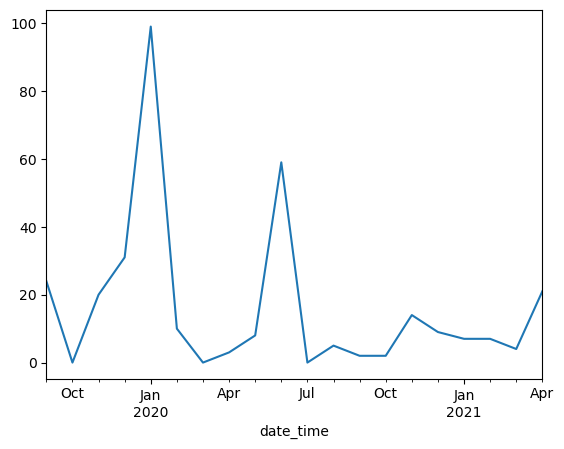

In [339]:
ds_students_webdev.path.resample('M').count().plot()
plt.show()

#### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

#### 7. Which lessons are least accessed?

In [482]:
counts = df.groupby('path').size().sort_values(ascending=True)


In [487]:
less_than_50 = counts[(counts < 50) & (counts > 20)]
less_than_50.head(50)

path
11.00_Intro.md                                                      21
content/php_ii/control-structures-i/while.html                      21
python/working-with-files                                           21
9-timeseries/3-acquire                                              21
9-timeseries/working-with-time-series-data-with-pandas              21
extra-challenges/mysql/mysql-extra-exercises                        21
appendix/postwork/pdf-parser                                        21
13._Storytelling                                                    21
content/javascript/objects/math.html                                21
content/javascript/arrays/gitbook/images/favicon.ico                21
content/laravel/quickstart/seeders.html                             22
9-timeseries/4-prep                                                 22
content/php_i/intro-to-operators/gitbook/images/favicon.ico         22
content/php_i/intro-to-operators/logical-operators.html             22
1